# Introduction to Pandas and Matplotlib

---

In [0]:
import pandas as pd # Pandas = 'Python Data Analysis Library' (https://pandas.pydata.org/)
import matplotlib  # A 2D plotting library (https://matplotlib.org/)
import matplotlib.pyplot as plt
import seaborn as sns # Statistical data visualization (https://seaborn.pydata.org/)

----

## Let's get started with Data Frames, a table structure of rows and columns used in Pandas

In [0]:
# We begin by creating a new data frame using pd.DataFrame
# We are then going to use a 'list of dictionaries', which we'll touch on briefly

df = pd.DataFrame([ 
    {"First Name": "Alex", "Last Name": "Siegman"}, 
    {"First Name": "John", "Last Name": "Doe"}
])

In [5]:
df

,First Name,Last Name
0,Alex,Siegman
1,John,Doe


### Let's dig a bit deeper to understand what just happened

In [0]:
dictionary = {"First Name": "Alex", "Last Name": "Siegman"}
               # <key>     <value>     <key>      <value>

In [7]:
dictionary['First Name']

'Alex'

In [8]:
dictionary['Last Name']

'Siegman'

In [9]:
df

,First Name,Last Name
0,Alex,Siegman
1,John,Doe


In [0]:
df[0] # note that this will give us an error

In [11]:
df['First Name'] # this is how we get what we need

0    Alex
1    John
Name: First Name, dtype: object

# So that's all a data frame is, it's a table of rows and columns! 

---

# Now, let's begin to delve further into Pandas with a different data set. 

In [12]:
!rm -f restaurant.csv* # 'rm' = 'remove'
                            # '-f' means 'force', aka, it will bypass permission checks
                            # 'data/restaurant.csv*' means we want to remove any file in our data directory that ends with 'resturant.csv'
                            # in total, this command removes any prior file, if it exists

!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o restaurant.csv
                            # 'curl' is a tool to transfer eata from or to a server
                            # for more on 'curl' visit (https://curl.haxx.se/docs/manpage.html)

# !gzip data/restaurant.csv # compress the file

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  163M    0  163M    0     0  2180k      0 --:--:--  0:01:16 --:--:-- 3418k


# Now that we have our data...

In [0]:
restaurants = pd.read_csv('./restaurant.csv', 
                         encoding = 'utf-8', # for more on UTF-8 check (https://www.w3schools.com/charsets/ref_html_utf8.asp)
                         dtype = 'unicode', # we are telling Pandas to read our data as data type object 'Unicode' which will make it a string
                         parse_dates = True, # parse our dates that are coming in as strings, as specified above
                         infer_datetime_format = True, # we are asking Pandas to infer the format of the datetime strings in the column so as to increase parsing speed
                         low_memory = False) # normally Pandas will try to automatically detrmine the dtype, which takes lots of memory

---

# For column definitions let's check out [the documentation](https://data.cityofnewyork.us/api/views/43nn-pn8j)

---

In [14]:
restaurants.head() # show us the first five rows of our data frame

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41449514,PURPLE YAM,Brooklyn,1314,CORTELYOU ROAD,11226,7189408188,Asian,01/25/2019,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Y,12,A,01/25/2019,04/02/2020,Cycle Inspection / Re-inspection,40.640516081385,-73.965949460277,314,40,052000,3118655,3051560006,BK42
1,40526147,LOS AMIGOS MEXICAN RESTAURANT,Queens,2273,31 STREET,11105,7187268708,Mexican,04/11/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,9,A,04/11/2017,04/02/2020,Cycle Inspection / Re-inspection,40.774602750508,-73.912542484783,401,22,011500,4438831,4008330002,QN72
2,41705474,DRAUGHT 55 BAR & KITCHEN,Manhattan,245,EAST 55 STREET,10022,2123004096,American,04/20/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,25,NaN,NaN,04/02/2020,Cycle Inspection / Initial Inspection,40.758511490599,-73.967433834067,106,04,010800,1038588,1013290121,MN19
3,50002324,DETOXX BAR,Queens,23416,LINDEN BLVD,11411,7189490008,"Juice, Smoothies, Fruit Salads",04/17/2019,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Y,12,A,04/17/2019,04/02/2020,Cycle Inspection / Initial Inspection,40.690864169755,-73.727940473961,413,27,062200,4442293,4127510222,QN33
4,40861201,RED BAMBOO,Manhattan,140,WEST 4 STREET,10012,2122607049,Vegetarian,02/12/2020,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Y,18,NaN,NaN,04/02/2020,Cycle Inspection / Initial Inspection,40.731373159252,-74.000313910224,102,01,006500,1008755,1005430047,MN23


In [15]:
restaurants.tail() # show us the last five rows of our data frame

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
400878,50012297,YOUR DALEY BREAD,Bronx,1303,E GUN HILL RD,10469,3479134480,Caribbean,10/11/2017,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,12,A,10/11/2017,04/02/2020,Cycle Inspection / Re-inspection,40.871507614408,-73.8482521624,212,12,036400,2061677,2047590001,BX03
400879,50000504,MAMABITES,Queens,4209,28 STREET,11101,3473617735,American,10/04/2019,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Y,7,A,10/04/2019,04/02/2020,Cycle Inspection / Re-inspection,40.749634394008,-73.939135181882,402,26,001900,4538327,4004200101,QN31
400880,41641668,PLUM TREE RESTAURANT,Brooklyn,1832,SCHENECTADY AVENUE,11234,7186767470,Caribbean,01/23/2018,Establishment Closed by DOHMH. Violations wer...,10F,Non-food contact surface improperly constructe...,N,34,NaN,NaN,04/02/2020,Cycle Inspection / Re-inspection,40.627517375288,-73.93073420343,318,45,073000,3216227,3077940047,BK58
400881,50072522,IGNITED RESTAURANT & LOUNGE,Queens,3027,STEINWAY ST,11103,7184122414,Middle Eastern,11/13/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,11,A,11/13/2019,04/02/2020,Cycle Inspection / Re-inspection,40.763016737139,-73.915687528232,401,22,014900,4011249,4006800039,QN70
400882,50049490,COZY COFFEE,Brooklyn,925B,MARCY AVE,11216,6462075854,Café/Coffee/Tea,12/19/2017,Establishment Closed by DOHMH. Violations wer...,06D,"Food contact surface not properly washed, rins...",Y,59,NaN,NaN,04/02/2020,Cycle Inspection / Initial Inspection,40.681383858026,-73.946415823671,303,36,026900,3331201,3018510001,BK75


# Now that we have successfully read our CSV, let's look at some basics

In [16]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
count,400883,400512,400883,400617,400879,395451,400866,400883,400883,399595,395343,391960,391960,384181,203199,200549,400883,399595,400459,400459,395031,395043,395043,393290,400459,395031
unique,27252,21580,6,7298,3236,225,25511,84,1337,5,104,89,2,136,7,1272,1,31,22675,22675,69,51,1184,19710,19408,193
top,50018552,DUNKIN',Manhattan,1,BROADWAY,10003,7185958100,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Y,12,A,06/13/2019,04/02/2020,Cycle Inspection / Initial Inspection,0,0,105,03,003800,4000000,1,MN17
freq,98,4150,158077,2296,14674,10368,274,83424,1288,374936,57360,57360,218881,41855,160104,501,400883,234680,5428,5428,32380,35279,3270,2419,3102,23712


In [17]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400883 entries, 0 to 400882
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   CAMIS                  400883 non-null  object
 1   DBA                    400512 non-null  object
 2   BORO                   400883 non-null  object
 3   BUILDING               400617 non-null  object
 4   STREET                 400879 non-null  object
 5   ZIPCODE                395451 non-null  object
 6   PHONE                  400866 non-null  object
 7   CUISINE DESCRIPTION    400883 non-null  object
 8   INSPECTION DATE        400883 non-null  object
 9   ACTION                 399595 non-null  object
 10  VIOLATION CODE         395343 non-null  object
 11  VIOLATION DESCRIPTION  391960 non-null  object
 12  CRITICAL FLAG          391960 non-null  object
 13  SCORE                  384181 non-null  object
 14  GRADE                  203199 non-null  object
 15  

# Note that above all of our data is stored as a non-null object, aka, a string.  But 'Score' is not a string, it's a numerical value. So let's work to alter that in our data frame.

In [18]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
# we are setting the value of our column equal to itself, but now with the caveat that we want it converted 'to numeric'

restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                  object
Longitude                 object
Community Board           object
Council District          object
Census Tract              object
BIN                       object
BBL                       object
NTA                       object
dtype: object

In [19]:
restaurants.SCORE.describe() # let's get some more info on our "SCORE" column...

count    384181.000000
mean         20.409081
std          14.839614
min          -1.000000
25%          11.000000
50%          15.000000
75%          26.000000
max         164.000000
Name: SCORE, dtype: float64

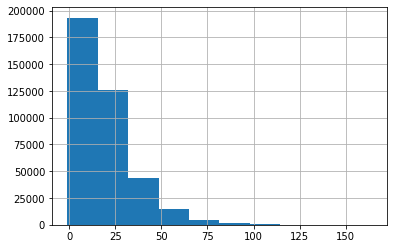

In [20]:
restaurants["SCORE"].hist()

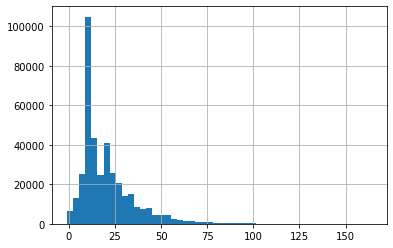

In [21]:
restaurants["SCORE"].hist(bins=50) # let's change the default number of bins

# Let's take a moment to explore what else we can customize in our histogram.

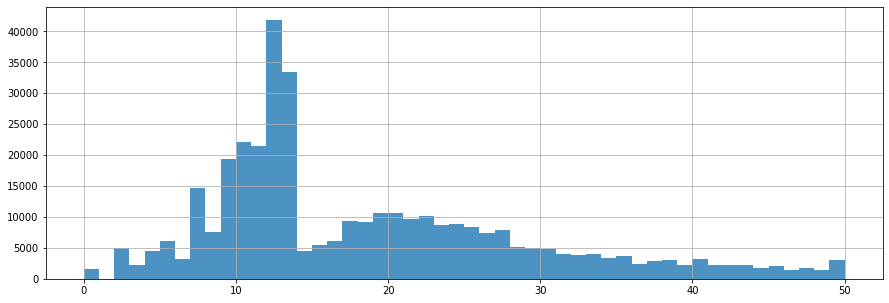

In [22]:
restaurants["SCORE"].hist(bins=50, # use 50 bins
                      range=(0,50), # our x-axis will range from 0 to 50
                      density=False, # show the raw count; to show normalized count use (density=True)
                      figsize=(15,5), # control the size of the plot
                      alpha = 0.8 # make plot 20% transparent
                      )

# We can also use KDE (kernel density estimation) to estimate a continuous function, instead of bucketized as above.

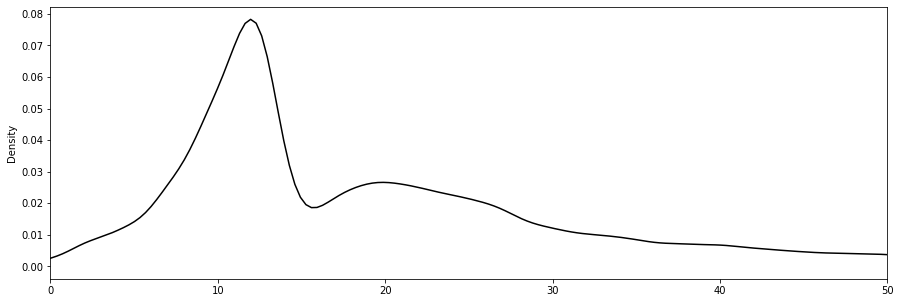

In [23]:
restaurants["SCORE"].plot(
    kind = 'kde',
    color = 'Black', 
    xlim = (0, 50),
    figsize = (15, 5)
)

---

# Now let's do some work with dates.

In [24]:
restaurants["GRADE DATE"].head(10) # show us the first ten values of this column

0    01/25/2019
1    04/11/2017
2           NaN
3    04/17/2019
4           NaN
5    04/04/2019
6    10/01/2019
7    06/23/2016
8           NaN
9           NaN
Name: GRADE DATE, dtype: object

# Note that our dates are stored as strings, which doesn't really help us. So, we can convert all of our dates using the 'to_datetime' function, and format them as illustrated below.

In [0]:
# %m Month as a zero-padded decimal number
# %d Day of month as a zero-padded decimal number
# %y Year with century as a decimal number

restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [27]:
restaurants.dtypes # let's check to make sure our code above worked...

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


In [28]:
restaurants[["INSPECTION DATE","GRADE DATE","RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,400883,200549,400883
unique,1337,1272,1
top,1900-01-01 00:00:00,2019-06-13 00:00:00,2020-04-02 00:00:00
freq,1288,501,400883
first,1900-01-01 00:00:00,2013-06-07 00:00:00,2020-04-02 00:00:00
last,2020-03-16 00:00:00,2020-03-16 00:00:00,2020-04-02 00:00:00


---

# Exercise 1: Plot a histogram of our dates

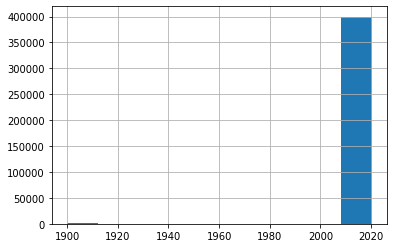

In [30]:
# your code here
restaurants['INSPECTION DATE'].hist()

# Solution 1:

In [0]:
restaurants["INSPECTION DATE"].hist()

---

# Exericse 2: Change the number of bins in our histogram

In [0]:
# your code here

# Solution 2: 

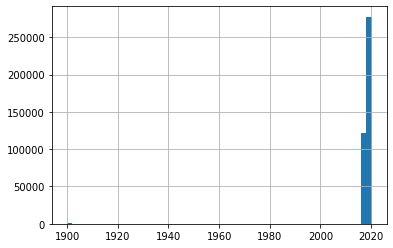

In [32]:
restaurants["INSPECTION DATE"].hist(bins=60)

---

# Exercise 3: Focus on the dates 1/1/2014 thru 05/31/2018

In [0]:
# your code here

# Solution 3:

ConversionError: ignored

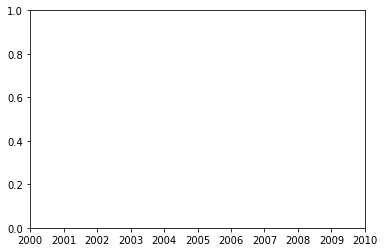

In [35]:
restaurants["INSPECTION DATE"].hist(
    range = ('1/1/2014', '9/30/2018'),
    bins = 57, # number of months in the range, computed manually
    figsize = (15,5)
)

---

# Now that we've worked with our dates, let's look at categorical values.

# Sometimes we need categorical values, when we have a variable that has an implicit order, for instance an 'ABC' grade (as we do in our restaurants data set).

In [36]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False) 
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
# 'ordered=True' means that we are saying there are three categories, and 'A' > 'B' > 'C', in that order
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)

restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                         object
Longitude                        object
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


# Let's delve into a particular column, 'CUISINE DESCRIPTION'

In [37]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5] # give us the 'value_counts' of the first five columns

American                                                            83424
Chinese                                                             42348
Café/Coffee/Tea                                                     19844
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    17643
Pizza                                                               17448
Name: CUISINE DESCRIPTION, dtype: int64

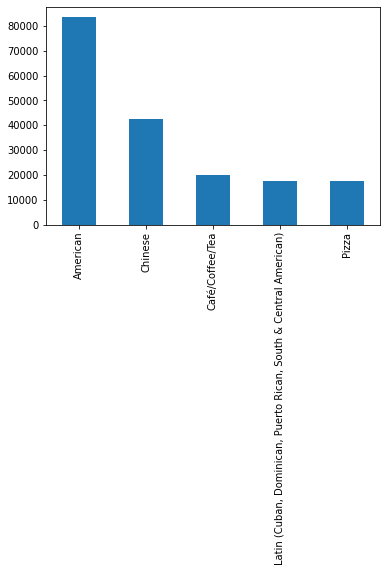

In [38]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

# ^ That is super ugly. Let's shorten the name of 'Latin (Cuban, Dominican...' because it is messing up our formatting.

In [0]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)', # replace this...
    value = 'Latin American', # with this
    inplace=True # inplace=True means we change direclty the dataframe instead of returning a ndw df qithout the deleted value
)

# While we're at it, let's fix the formattig in 'Cafe/Coffee/Tea'

In [0]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea', # replace this
    value = 'Cafe/Coffee/Tea', # with this
    inplace=True  #parmenantly changed
)

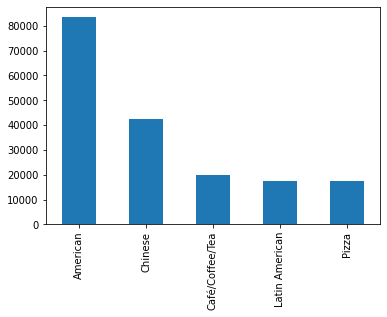

In [42]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

---

# Exercise 4: What are the 10 most common violation codes? 

In [46]:
# your code here
restaurants['VIOLATION CODE'].value_counts()[:10]

10F    57360
08A    44503
04L    29864
06D    27502
06C    24316
10B    23451
02G    23030
04N    20993
02B    20517
04M     8856
Name: VIOLATION CODE, dtype: int64

# Solution 4: 

In [43]:
violation_counts = restaurants["VIOLATION CODE"].value_counts(); 

violation_counts[0:10]

10F    57360
08A    44503
04L    29864
06D    27502
06C    24316
10B    23451
02G    23030
04N    20993
02B    20517
04M     8856
Name: VIOLATION CODE, dtype: int64

---

# Exercise 5: Plot the 10 most common violation codes as a bar chart

In [0]:
# your code here

# Solution 5: 

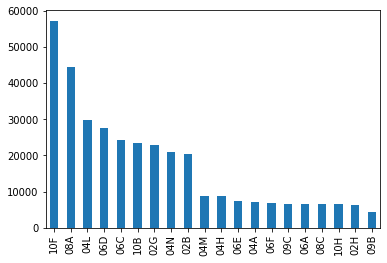

In [44]:
violation_counts[0:20].plot(kind='bar')

---

# Exercise 6: Plot the numer of inspections across each bourough

In [0]:
# your code here

# Solution 6:

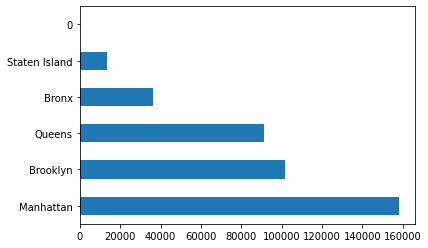

In [45]:
restaurants["BORO"].value_counts().plot(kind='barh') # the 'h' makes it horizontal

---

# Imagine we want to get a subset of our data frame based on the columns we're interested in.

In [47]:
columns = ["GRADE DATE","VIOLATION CODE","DBA","SCORE"] # create a list of the columns we're interested in 
restaurants[columns].head(10)

,GRADE DATE,VIOLATION CODE,DBA,SCORE
0,2019-01-25,06F,PURPLE YAM,12.0
1,2017-04-11,10B,LOS AMIGOS MEXICAN RESTAURANT,9.0
2,NaT,04L,DRAUGHT 55 BAR & KITCHEN,25.0
3,2019-04-17,02H,DETOXX BAR,12.0
4,NaT,06E,RED BAMBOO,18.0
5,2019-04-04,08A,CINNAMON GARDEN,12.0
6,2019-10-01,10F,ISLAND,11.0
7,2016-06-23,10B,PAUL'S DAUGHTER,12.0
8,NaT,06C,HAPPY HOME CUISINE,16.0
9,NaT,09B,BREAD & BUTTER,39.0


# What if instead we wanted to select the rows we're interested in? Well, to do that, we can generate a list of boolean (True or Fale) values, one for each row of our Data Frame, then use a list to see which rows to keep. 

# In this case, '04L' is the code for 'has mice'.


In [48]:
mice = restaurants["VIOLATION CODE"] == "04L"

mice

0         False
1         False
2          True
3         False
4         False
          ...  
400878     True
400879    False
400880    False
400881    False
400882    False
Name: VIOLATION CODE, Length: 400883, dtype: bool

In [49]:
has_mice = restaurants[mice] # let's apply this new condition to our original df ('restaurants') and store the result 
                             # in a new data frame called 'has_mice'

has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
2,41705474,DRAUGHT 55 BAR & KITCHEN,Manhattan,245,EAST 55 STREET,10022,2123004096,American,2018-04-20,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,25.0,NaN,NaT,2020-04-02,Cycle Inspection / Initial Inspection,40.758511490599,-73.967433834067,106,04,010800,1038588,1013290121,MN19
20,41421560,ISLAND GROVE RESTAURANT,Brooklyn,5600,CLARENDON ROAD,11203,7184843192,Caribbean,2019-08-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,19.0,B,2019-08-12,2020-04-02,Cycle Inspection / Re-inspection,40.644799531187,-73.923671419324,317,45,094600,3106043,3047770001,BK96
26,50067182,SIK GAEK,Queens,4911,ROOSEVELT AVE,11377,7182054555,Korean,2020-01-06,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,21.0,NaN,NaT,2020-04-02,Cycle Inspection / Initial Inspection,40.743207748804,-73.915626081691,402,26,025301,4001278,4001380001,QN31
28,50064521,GONG CHA,Brooklyn,156,LAWRENCE ST,11201,9179091207,"Juice, Smoothies, Fruit Salads",2019-11-20,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,12.0,A,2019-11-20,2020-04-02,Cycle Inspection / Initial Inspection,40.691740618406,-73.986304372011,302,33,001100,3000399,3001510040,BK38
29,41638553,BRICIOLA,Manhattan,370,WEST 51 STREET,10019,6466785763,Italian,2018-10-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,10.0,A,2018-10-16,2020-04-02,Cycle Inspection / Re-inspection,40.763854030179,-73.987917564599,104,03,013300,1025187,1010410061,MN15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400809,41713405,CAFE RUE DIX,Brooklyn,1451,BEDFORD AVENUE,11216,9292342543,African,2017-09-29,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,26.0,NaN,NaT,2020-04-02,Cycle Inspection / Initial Inspection,40.673490446115,-73.954035993322,308,36,021900,3031466,3012390015,BK61
400816,50015433,FRUCES,Manhattan,1496,AMSTERDAM AVE,10031,6468843016,"Juice, Smoothies, Fruit Salads",2019-06-14,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,10.0,A,2019-06-14,2020-04-02,Cycle Inspection / Re-inspection,40.818097718134,-73.952830188244,109,07,021900,1059742,1019870036,MN06
400822,50018732,LA CONTENTA,Manhattan,102,NORFOLK ST,10002,2124324180,Mexican,2018-09-18,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,13.0,A,2018-09-18,2020-04-02,Cycle Inspection / Re-inspection,40.718812385599,-73.987124900726,103,01,001402,1004299,1003530049,MN28
400827,40364335,PETER LUGER STEAKHOUSE,Brooklyn,178,BROADWAY,11211,7183877400,Steak,2017-11-30,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,10.0,A,2017-11-30,2020-04-02,Cycle Inspection / Re-inspection,40.709979804558,-73.962512437328,301,34,054900,3335296,3021320021,BK73


---

# Exercise 7: Which restaurants have the most mice complaints? 

In [0]:
# your code here

# Solution 7: 

In [50]:
has_mice["DBA"].value_counts()[:20] # "DBA" represents the name 'Doing Business As" of the entity'

SUBWAY                                   255
DUNKIN'                                  146
KENNEDY FRIED CHICKEN                    127
CROWN FRIED CHICKEN                      116
STARBUCKS                                 85
MCDONALD'S                                74
POPEYES                                   71
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     67
BURGER KING                               65
DUNKIN', BASKIN ROBBINS                   57
KFC                                       40
LE PAIN QUOTIDIEN                         38
DOMINO'S                                  37
LITTLE CAESARS                            33
AMC THEATRES                              31
CARVEL ICE CREAM                          29
VIVI BUBBLE TEA                           22
PAPA JOHN'S                               22
EMPANADAS MONUMENTAL                      21
INSOMNIA COOKIES                          21
Name: DBA, dtype: int64

---

# Exercise 8: Let's pull up all of Subway's mice complaints

In [0]:
# your code here

# Solution 8:

In [0]:
has_mice.loc[has_mice["DBA"]=="SUBWAY"]

---

# Now let's do some work with Pivot Tables. First, let's count the number of restaurants inspected every day.

In [0]:
pivot = pd.pivot_table(
    data=restaurants,
    index = "INSPECTION DATE", # specifies rows
    values = "CAMIS", # specifies content of cells
    aggfunc = "count" # ask to count how many different CAMIS values we see
)

In [53]:
pivot

,CAMIS
INSPECTION DATE,
1900-01-01,1288
2013-06-07,1
2013-10-22,2
2014-03-06,1
2014-04-21,2
...,...
2020-03-11,632
2020-03-12,723
2020-03-13,397


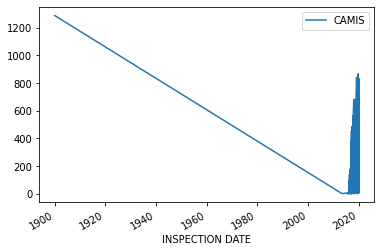

In [54]:
pivot.plot() 

In [55]:
pivot.head()

,CAMIS
INSPECTION DATE,
1900-01-01,1288
2013-06-07,1
2013-10-22,2
2014-03-06,1
2014-04-21,2


# It looks like that 1900-01-01 value is really throwing us off. Let's get rid of it. 

In [0]:
pivot.drop(pd.to_datetime('1900-01-01'),axis='index',inplace=True)

# we use pd.to_datetime to convert '1900-01-01' string to a datetime data type
# we use axis='index' to specify that we mean delete a row with that index value

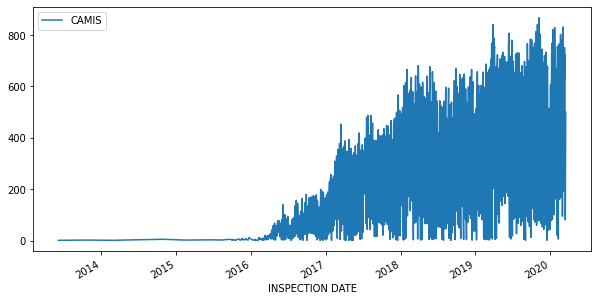

In [57]:
pivot.plot(figsize=(10,5))

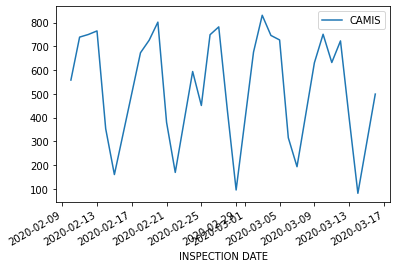

In [58]:
pivot.tail(30).plot() # let's look at the last 30 days

In [59]:
pivot.resample('1W').mean().tail(10) # use resample command to change frequency from one to 7 days, then compute the 
                                     # mean for these days (aka, the sum of total inspections)


,CAMIS
INSPECTION DATE,
2020-01-19,586.833333
2020-01-26,516.600000
2020-02-02,449.571429
2020-02-09,487.857143
2020-02-16,554.166667
2020-02-23,550.000000
2020-03-01,516.500000
2020-03-08,581.333333
2020-03-15,535.833333


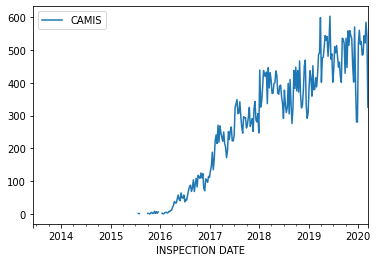

In [60]:
pivot.resample('7D').mean().plot() # plot the number of inspections over 7 days

---

# Exercise 9: Plot the total number of inspections over 1 month

In [0]:
# your code here

# Solution 9: 

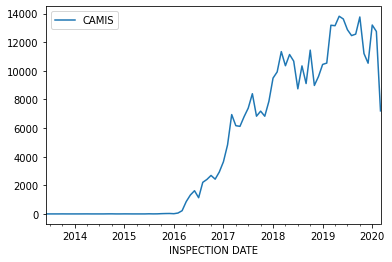

In [61]:
pivot.resample('1M').sum().plot()

---

# We can also add some basic titles to our plot.

Text(0.5, 1.0, 'Analysis of Number of Inspections over Time')

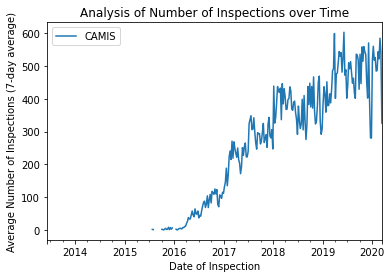

In [62]:
plot = pivot.resample('7D').mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time")

---

# Exercise 10: Create a pivot table where we break down the results by boro

In [0]:
# your code here

# Solution 10: 

In [63]:
boro_pivot = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)

boro_pivot.tail(10)

BORO,0,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION DATE,,,,,,
2020-03-05,NaN,15.0,161.0,275.0,223.0,53.0
2020-03-06,NaN,19.0,40.0,220.0,36.0,NaN
2020-03-07,NaN,NaN,51.0,43.0,99.0,NaN
2020-03-09,NaN,60.0,187.0,235.0,134.0,15.0
2020-03-10,NaN,22.0,285.0,290.0,154.0,NaN
2020-03-11,NaN,67.0,99.0,267.0,168.0,31.0
2020-03-12,NaN,41.0,225.0,274.0,166.0,17.0
2020-03-13,NaN,24.0,139.0,202.0,32.0,NaN
2020-03-14,NaN,NaN,34.0,18.0,29.0,NaN


---

---

# Let's now take some time to explore Matplotlib

---

---

In [0]:
%matplotlib inline 
# the '%' is an example of a 'magic command' that allows us to make use of matplotlibs interactivity

import matplotlib.pyplot as plt
import numpy as np

In [65]:
np.random.normal(size=10)

array([-0.06425214, -0.94823324,  0.71348713, -0.80166777, -0.2518281 ,
       -1.60761705, -0.51393474, -2.28944213,  0.52064897, -0.41728056])

In [0]:
t = np.arange(0., 5., 0.1) # every sampled value between 0 and 5, at .2 intervals

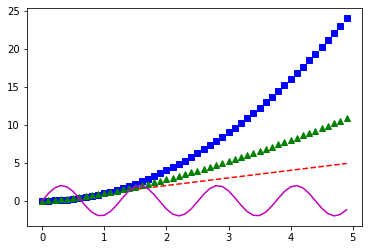

In [67]:
import math 

plt.plot(t, t, 'r--') # plot t as is with red dashes
plt.plot(t, t**2, 'bs') # plot t**2 with blue squares
plt.plot(t, t**1.5, 'g^') # plot t**1.5 with green triangles
plt.plot(t, 2*np.sin(5*t), 'm-') # plot 2**sin(5*t) with magenta line
plt.show()

# Note, there are lots of predefined styles available, too


In [68]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


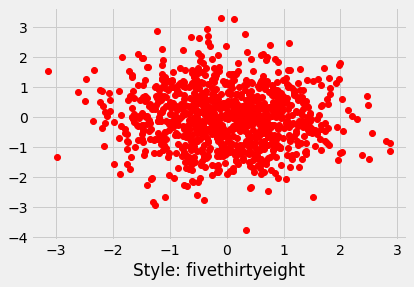

In [69]:
xvalues = np.random.normal(size=1000) # an array of 1,000 floats
yvalues = np.random.normal(size=1000) # an array of 1,000 floats

plt.style.use(u'fivethirtyeight')
plt.plot(xvalues, yvalues, 'ro')
plt.xlabel("Style: fivethirtyeight")
plt.show()

# Let's break down all the possibilities with Matplotlib

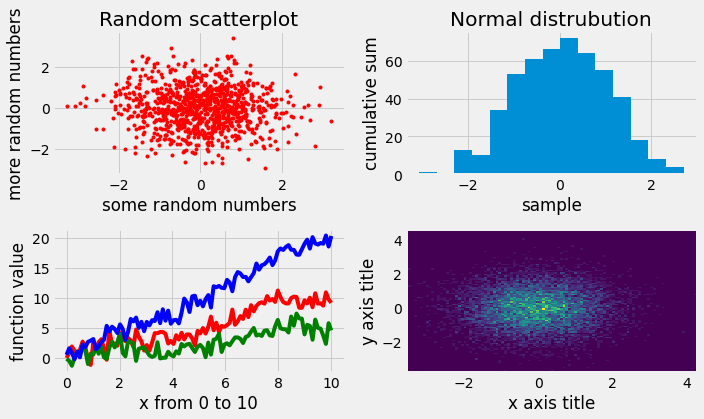

In [70]:
fig = plt.figure(figsize=(10,6))

# Create the first subfigure
sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('some random numbers')
sub1.set_ylabel('more random numbers')
sub1.set_title("Random scatterplot")
sub1.plot(np.random.randn(1000), np.random.randn(1000), 'r.')

# Create the second subfigure
sub2 = fig.add_subplot(2,2,2)
sub2.hist(np.random.normal(size=500), bins=15)
sub2.set_xlabel('sample')
sub2.set_ylabel('cumulative sum')
sub2.set_title("Normal distrubution")

# Create the third subfigure
numpoints = 100
x = np.linspace(0, 10, num=numpoints)
sub3 = fig.add_subplot(2,2,3)
sub3.plot(x, np.sin(x) + x + np.random.randn(numpoints), "r")
sub3.plot(x, np.sin(x) + 0.5 * x + np.random.randn(numpoints), "g")
sub3.plot(x, np.sin(x) + 2 * x + np.random.randn(numpoints), "b")
sub3.set_xlabel('x from 0 to 10')
sub3.set_ylabel('function value')

# Create the fourth subfigure
sub4 = fig.add_subplot(2,2,4)
x = np.random.randn(10000)
y = np.random.randn(10000)
sub4.hist2d(x,y,bins=100);
sub4.set_xlabel('x axis title')
sub4.set_ylabel('y axis title')

plt.tight_layout()
plt.savefig("normalvars.png", dpi=150)

# A bit more on what can be done...

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3a7b824a8>,
      dtype=object)

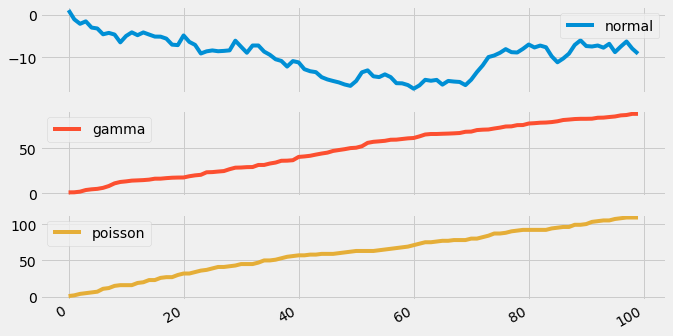

In [71]:
# We can split multiple series into subplots with a single argument

variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})

variables.cumsum(0).plot(subplots=True,figsize=(10,6))

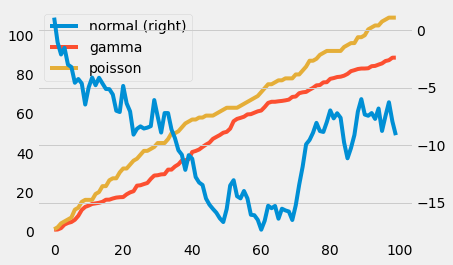

In [72]:
# Or, have some series displayed on secondary y-axis

variables.cumsum(0).plot(secondary_y='normal')

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum (normal)')
axes[1].set_ylabel('cumulative sum (gamma)')
axes[2].set_ylabel('cumulative sum (poisson)')

# Let's check out a new data set

In [73]:
titanic = pd.read_csv('./titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [74]:
titanic.groupby('Pclass').Survived.sum() # How many survivors are there based on passenger class? 

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

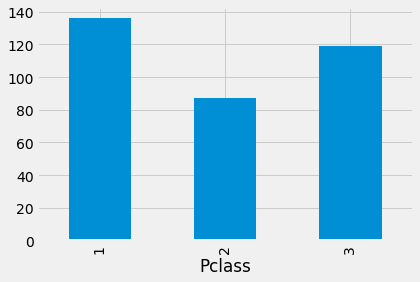

In [75]:
titanic.groupby('Pclass').Survived.sum().plot(kind='bar')

In [76]:
titanic.groupby(['Sex','Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.137026
Name: Survived, dtype: float64

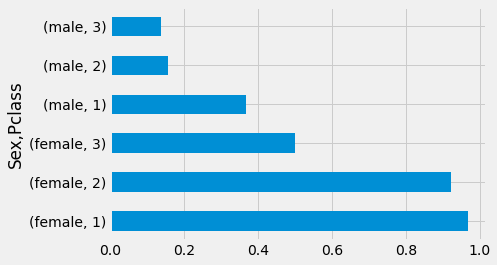

In [77]:
titanic.groupby(['Sex','Pclass']).Survived.mean().plot(kind='barh')

In [78]:
death_counts = pd.crosstab([titanic.Pclass, titanic.Sex], titanic.Survived.astype(bool))
death_counts

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      296     47

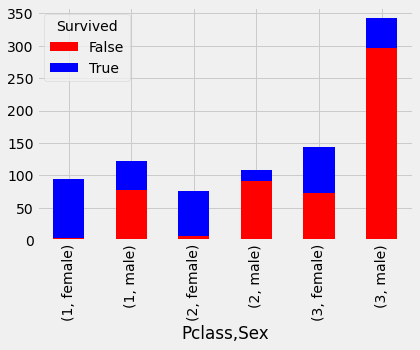

In [79]:
death_counts.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

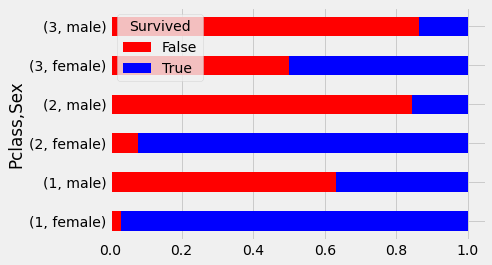

In [80]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['red','blue'])

---

# Histograms

---

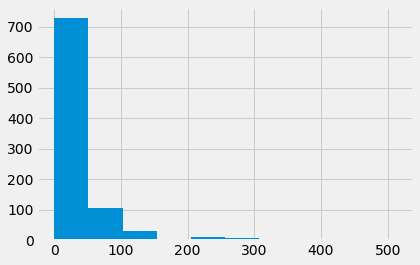

In [81]:
# How were fares distributed aboard the titanic? 

titanic["Fare"].hist()

---

# Exercise 12: How do we divide our histogram into 30 bins? 

In [0]:
# your code here

# Solution 12: 

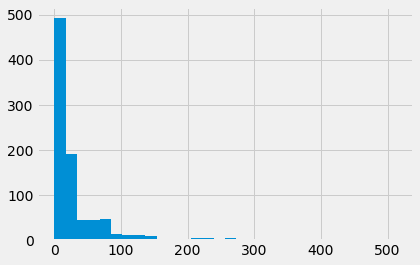

In [82]:
titanic["Fare"].hist(bins=30)

---

# Density Plots

## Rather than purely represent the underlying data, this is an _estimate_ of the underlying true distribution.

---

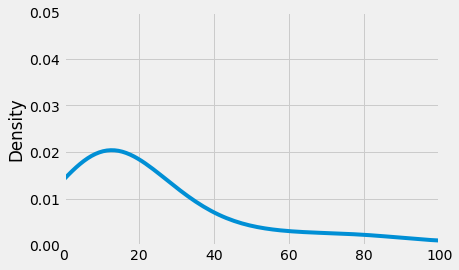

In [83]:
titanic["Fare"].plot(kind='kde', xlim=(0,100), ylim=(0,0.05))

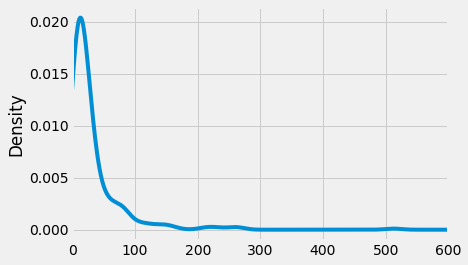

In [84]:
titanic["Fare"].plot(kind='kde', xlim=(0,600)) # notice what happens when we change our xlim

---

# Boxplots

## Think of a boxplot as viewing the data 'from above'. 

---

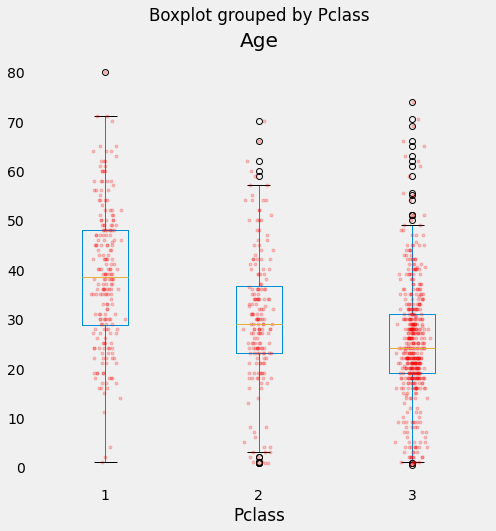

In [85]:
bp = titanic.boxplot(column='Age', by='Pclass', grid=False, figsize=(8,8))
for i in [1,2,3]:
    y = titanic.Age[titanic.Pclass==i].dropna()
    x = np.random.normal(i, 0.04, size=len(y)) # Add some random "jitter" to the x-axis

    plt.plot(x, y, 'r.', alpha=0.2)

---

# Scatterplots

---

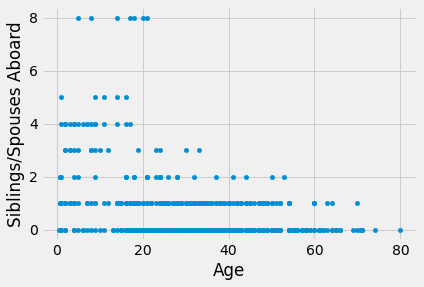

In [86]:
fig = titanic.plot(kind="scatter", x='Age', y='Siblings/Spouses Aboard')

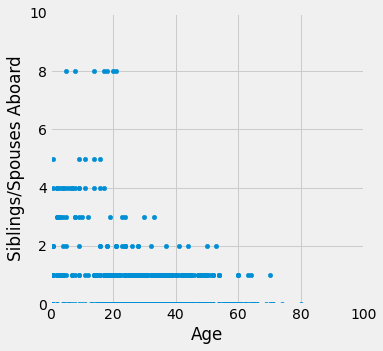

In [87]:
fig = titanic.plot(kind="scatter", x='Age', y='Siblings/Spouses Aboard',xlim=[0,100], ylim=[0,10],figsize=(5,5))

# We can even go so far as to assign variables to either the size or symbols of their colors

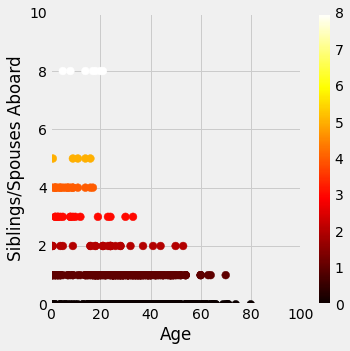

In [88]:
fig = titanic.plot(kind='scatter', x='Age', y='Siblings/Spouses Aboard', xlim=[0,100], ylim=[0,10], 
                    figsize=(5,5), c=titanic['Siblings/Spouses Aboard'], s=60, cmap='hot')

---

# Hexagonal Bin Plot

## This is perfect for when you have a larger number of points to display. It's also useful if your data are too dense to plot each point individually in a scatter plot.

---

In [0]:
df = pd.DataFrame( np.random.randn(10000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(10000)

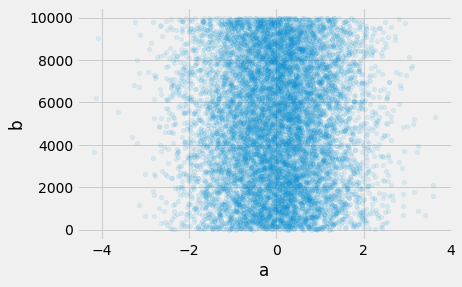

In [90]:
df.plot(kind='scatter', x='a', y='b', figsize=(6,4), alpha=0.1)

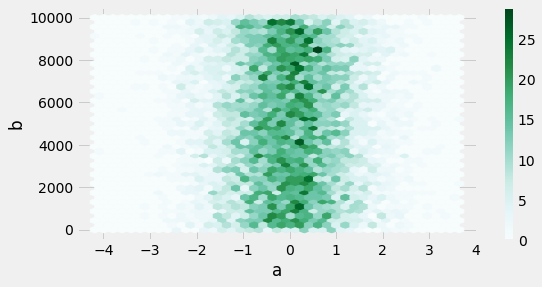

In [91]:
df.plot(kind='hexbin', x='a', y='b', gridsize=40,figsize=(8,4))

----